# Worksheet 18

Name:  Zhupei Xu
UID: U83632486  

### Topics

- Linear Regression

### Optional Challenge

Every day my alarm goes off at seemingly random times… I’ve recorded the times at which it goes off for the past year of so (1 - 355 days). Today is day 356. Can you predict when my alarm will ring using `data.csv`?

Please fill out the piazza poll if you think you found the answer.

## Linear Regression

a) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 0.5 * X + eps`.

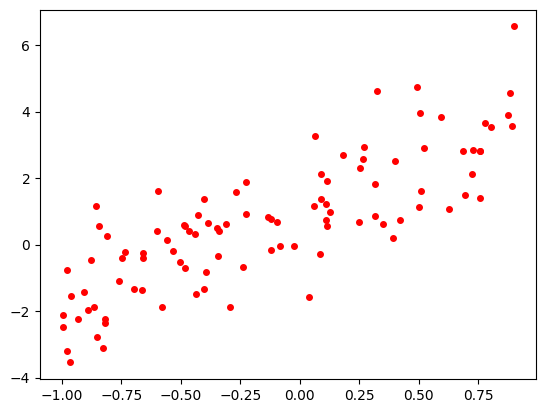

In [1]:
import numpy as np
import matplotlib.pyplot as plt

SAMPLE_SIZE = 100

true_beta = np.array([ 1 , 3 ])
x = -1.0 + 2.0 * np.random.random(SAMPLE_SIZE)
y = true_beta[0] + true_beta[1] * x + np.random.randn(SAMPLE_SIZE)
plt.plot(x,y,'ro',markersize=4)
plt.show()

b) Plot the least squares estimate line through the scatter plot.

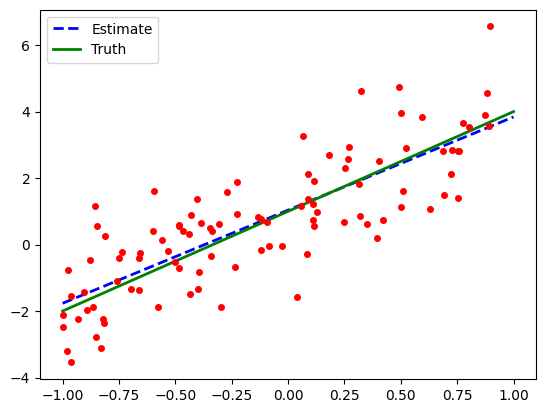

In [2]:
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

x_plot = np.linspace(-1,1,50)
y_est = beta_hat[0] + beta_hat[1] * x_plot
plt.plot(x_plot, y_est,'b--', lw=2, label='Estimate')
plt.plot(x_plot, true_beta[0] + true_beta[1] * x_plot, lw=2, c='g', label='Truth')
plt.plot(x, y,'ro',markersize=4)
plt.legend()
plt.show()

c) How does the estimate of `beta` compare to the parameters we used to generate the data?

estimates are quite close to the true parameters

d) Create and plot a dataset of 100 (Y, X) points where `Y = 1 + 3 * X + .5 * X^2 + eps`.

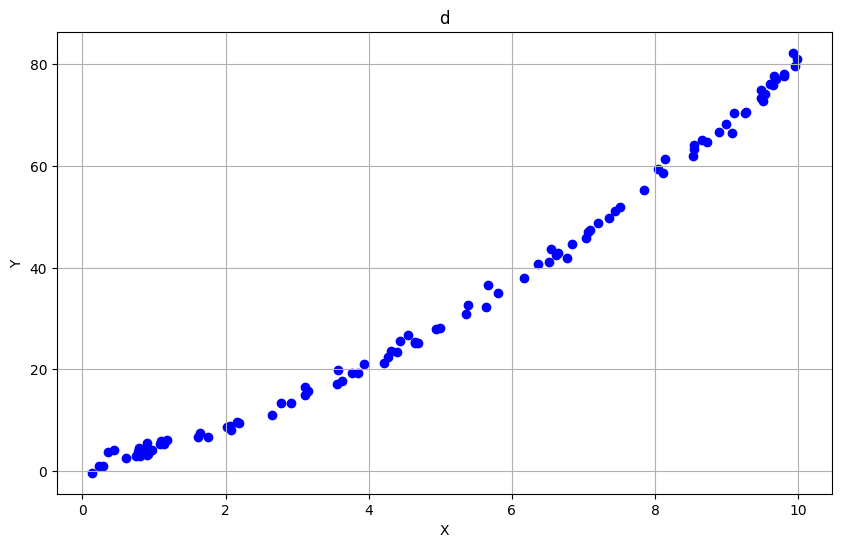

In [7]:
a, b, c = 1, 3, 0.5  

SAMPLE_SIZE = 100

# Generate random X values
X_quad = np.random.rand(SAMPLE_SIZE) * 10  # 100 random points between 0 and 10

# Generate Y values using the quadratic model with added noise
eps_quad = np.random.randn(SAMPLE_SIZE)  # random noise
Y_quad = a + b * X_quad + c * X_quad**2 + eps_quad

# Plotting the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X_quad, Y_quad, color='blue')
plt.title("d")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

e) Plot the least squares estimate line through the scatter plot.

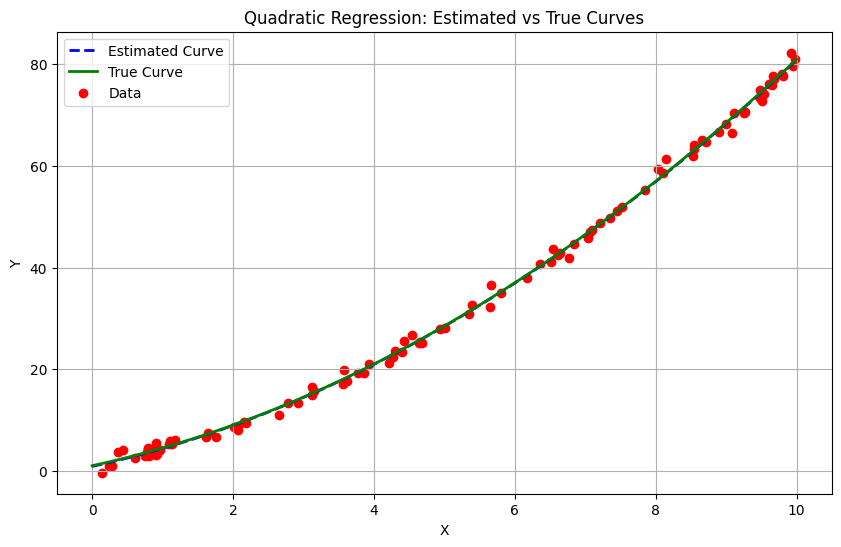

In [8]:
intercept = np.ones(SAMPLE_SIZE)
X_quad_matrix = np.column_stack((intercept, X_quad, X_quad**2))

# Compute the least squares estimate for beta
beta_hat_quad = np.linalg.inv(X_quad_matrix.T @ X_quad_matrix) @ X_quad_matrix.T @ Y_quad

# Predict values for the plot (estimated curve)
x_plot_quad = np.linspace(0, 10, 200)
y_est_quad = beta_hat_quad[0] + beta_hat_quad[1] * x_plot_quad + beta_hat_quad[2] * x_plot_quad**2
y_true_quad = a + b * x_plot_quad + c * x_plot_quad**2

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_plot_quad, y_est_quad, 'b--', lw=2, label='Estimated Curve')
plt.plot(x_plot_quad, y_true_quad, 'g-', lw=2, label='True Curve')
plt.scatter(X_quad, Y_quad, color='red', marker='o', label='Data')
plt.title("Quadratic Regression: Estimated vs True Curves")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()

f) How does the estimate of `beta` compare to the parameters we used to generate the data?

almost same, they overlap.

g) Let's repeat d) and f) a large number of times to see how close our estimates are on average and what that distribution looks like.

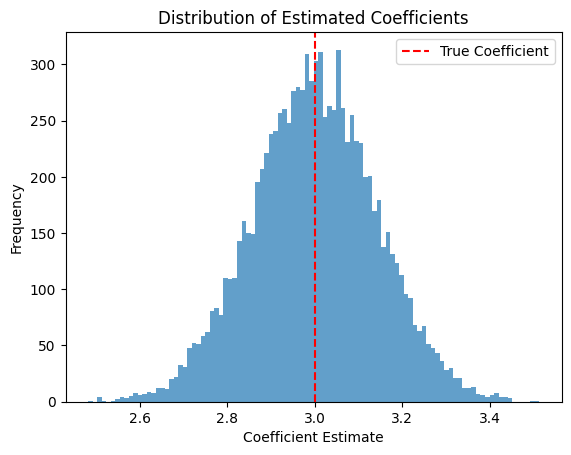

In [10]:
import numpy as np
import matplotlib.pyplot as plt
NUM_SIMULATIONS = 10000
betas = []

# True coefficients for the quadratic model
true_beta = np.array([1, 3, 0.5])  # Coefficients for Y = 1 + 3X + 0.5X^2

for _ in range(NUM_SIMULATIONS):
    x = np.random.rand(SAMPLE_SIZE) * 10
    y = true_beta[0] + true_beta[1] * x + true_beta[2] * x**2 + np.random.randn(SAMPLE_SIZE)

    # Creating the design matrix with an intercept, X, and X^2
    intercept = np.ones(SAMPLE_SIZE)
    X_matrix = np.column_stack((intercept, x, x**2))

    # Compute the least squares estimate for beta
    beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ y
    betas.append(beta_hat)

# Plotting the histogram of the second coefficient estimates (for X)
plt.hist(np.array(betas)[:, 1], bins=100, alpha=0.7)
plt.axvline(x=true_beta[1], c='r', linestyle='dashed', label='True Coefficient')
plt.title("Distribution of Estimated Coefficients")
plt.xlabel("Coefficient Estimate")
plt.ylabel("Frequency")
plt.legend()
plt.show()